# Assignment 1 DAVE3625
## Students: 
- S345867 Mohammed Ali Ansar
- S341825 Lavrans Bjerkestrand



# Task 1.1
5 unique features: 
1. Ledig_Kapasitet
2. Forsinkelse_Ankomst_Holdeplass_Fra
3. Forsinkelse_Avgang_Holdeplass_Fra
4. Tid_Brukt_På_Holdeplass
5. Mest brukte busstopp

In [13]:
import pandas as pd
from matplotlib import pyplot as plot
import numpy as np

url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'
df = pd.read_csv(url,sep = ';')

In [14]:
# Parse dates and times
df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')

df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']  = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'],    errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']   = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'],     errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'],   errors='coerce')
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']  = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'],    errors='coerce')

In [15]:
# Free Passenger Capacity
df['Ledig_Kapasitet'] = 100 - ((df['Passasjerer_Ombord'] / df['Kjøretøy_Kapasitet']) * 100)

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ledig_Kapasitet
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2021-09-27 10:53:53,2021-09-27 10:53:59,2021-09-27 10:53:00,2021-09-27 10:53:00,112,5,95.535714
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2021-09-27 13:12:20,2021-09-27 13:12:26,2021-09-27 13:12:00,2021-09-27 13:12:00,112,5,95.535714
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2021-09-27 10:18:56,2021-09-27 10:19:21,2021-09-27 10:19:00,2021-09-27 10:19:00,112,6,94.642857
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2021-09-27 13:52:04,2021-09-27 13:52:26,2021-09-27 13:51:00,2021-09-27 13:51:00,112,10,91.071429
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2021-09-27 07:34:13,2021-09-27 07:34:53,2021-09-27 07:33:00,2021-09-27 07:33:00,112,10,91.071429


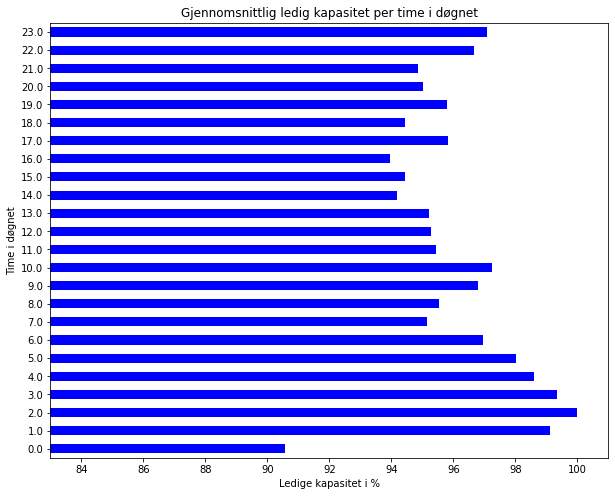

In [16]:
df['Timer'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].dt.hour

plot = df.groupby('Timer')['Ledig_Kapasitet'].mean().plot.barh(figsize=(10, 8), color='blue', title='Gjennomsnittlig ledig kapasitet per time i døgnet')
plot.set_xlabel('Ledige kapasitet i %')
plot.set_ylabel('Time i døgnet')
plot.set_xlim([83, 101])
plot.set_xmargin(2)

In [17]:
# Calculate delay
df['Forsinkelse_Ankomst_Holdeplass_Fra'] = (df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']) / np.timedelta64(1,'s') / 60
df['Forsinkelse_Avgang_Holdeplass_Fra'] = (df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']) / np.timedelta64(1,'s') / 60

# Calculate time spent at bus stop
df['Tid_Brukt_På_Holdeplass'] = (df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] - df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']) / np.timedelta64(1,'s')

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ledig_Kapasitet,Timer,Forsinkelse_Ankomst_Holdeplass_Fra,Forsinkelse_Avgang_Holdeplass_Fra,Tid_Brukt_På_Holdeplass
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-09-27 10:53:59,2021-09-27 10:53:00,2021-09-27 10:53:00,112,5,95.535714,10.0,0.883333,0.983333,6.0
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-09-27 13:12:26,2021-09-27 13:12:00,2021-09-27 13:12:00,112,5,95.535714,13.0,0.333333,0.433333,6.0
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-09-27 10:19:21,2021-09-27 10:19:00,2021-09-27 10:19:00,112,6,94.642857,10.0,-0.066667,0.350000,25.0
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-09-27 13:52:26,2021-09-27 13:51:00,2021-09-27 13:51:00,112,10,91.071429,13.0,1.066667,1.433333,22.0
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-09-27 07:34:53,2021-09-27 07:33:00,2021-09-27 07:33:00,112,10,91.071429,7.0,1.216667,1.883333,40.0


/var/folders/jh/3hj95q8s2zbbvrshhr0rpw_r0000gn/T/ipykernel_76715/564623567.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df.groupby('Timer')['Forsinkelse_Ankomst_Holdeplass_Fra', 'Forsinkelse_Avgang_Holdeplass_Fra'].mean().plot.barh(figsize=(10,8), color=['orange', 'red'], title='Forsinkelse per time i døgnet')


Text(0.5, 0, 'Minutter')

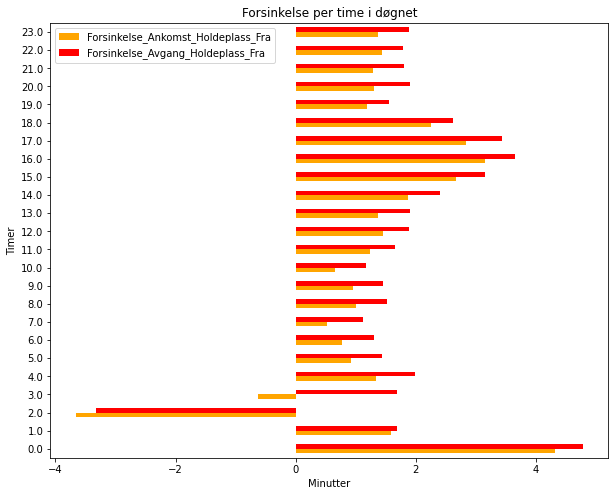

In [18]:
plot = df.groupby('Timer')['Forsinkelse_Ankomst_Holdeplass_Fra', 'Forsinkelse_Avgang_Holdeplass_Fra'].mean().plot.barh(figsize=(10,8), color=['orange', 'red'], title='Forsinkelse per time i døgnet')
plot.set_xlabel('Minutter')

Text(0.5, 0, 'Sekunder, gjennomsnitt')

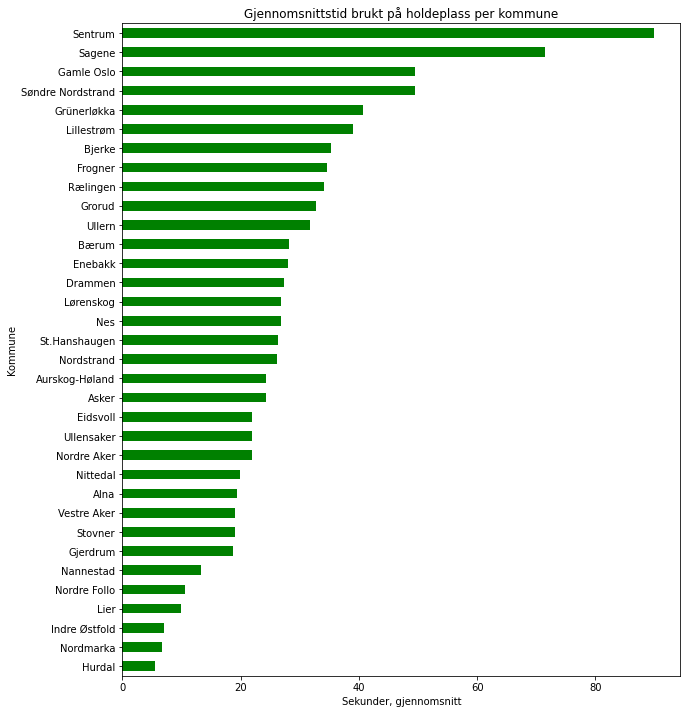

In [19]:
plot = df.groupby('Kommune')['Tid_Brukt_På_Holdeplass'].mean().sort_values().plot.barh(figsize=(10, 12), color='green', title='Gjennomsnittstid brukt på holdeplass per kommune')
plot.set_xlabel('Sekunder, gjennomsnitt')

Text(0.5, 0, 'Bussruter')

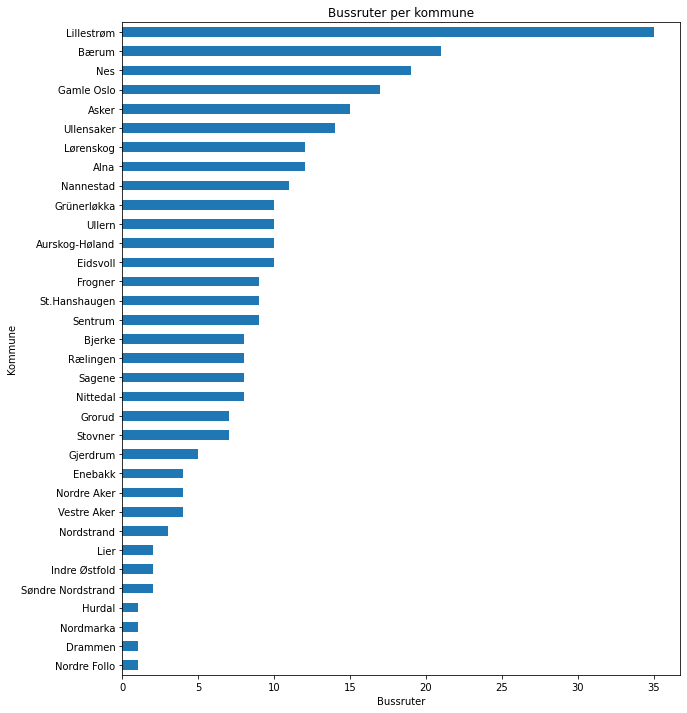

In [20]:
plot = df.groupby('Kommune')['Linjenavn'].nunique().sort_values().plot.barh(figsize=(10, 12), title='Bussruter per kommune')
plot.set_xlabel('Bussruter')

Text(0, 0.5, 'Holdeplass')

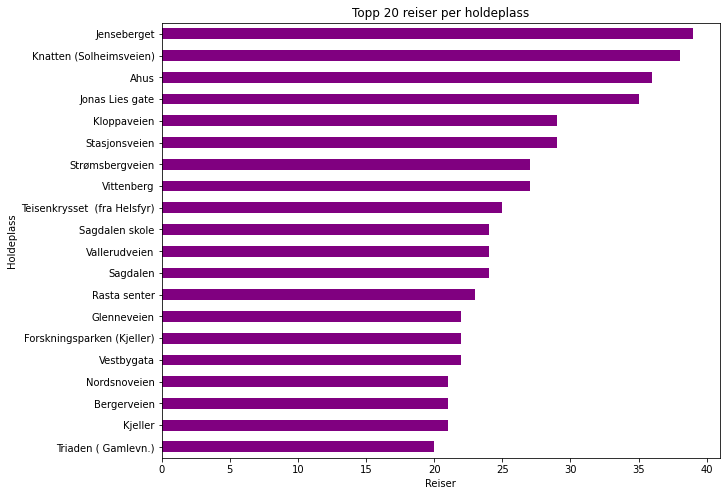

In [21]:
plot = df['Holdeplass_Fra'].value_counts()[:20].sort_values().plot.barh(figsize=(10, 8), color='purple', title='Topp 20 reiser per holdeplass')
plot.set_xlabel('Reiser')
plot.set_ylabel('Holdeplass')